In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Data fetching
import requests
import os
import gzip
import shutil
import itertools
import time

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Modeling
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Deep Learning
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Time Series Analysis
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Hyperparameter Optimization
import optuna

# Spark Session for large-scale data processing (if necessary)
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, trim, when, isnan, count, mean, last
from pyspark.sql.window import Window
from pyspark.sql.functions import col, isnan, count

# IPython Display Utilities (if necessary for downloading files etc.)
from IPython.display import FileLink

In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

## INDEX Indicator

In [3]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'  # API key

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP historical data endpoint
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock_symbol}?from=2004-01-04&to={datetime.now().strftime("%Y-%m-%d")}&apikey={api_key}'

# FMP API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Extract the historical data
    if 'historical' in data:
        historical_data = data['historical']

        # Convert to a pandas DataFrame
        index_df = pd.DataFrame(historical_data)

        # Save the DataFrame to a CSV file on your desktop
        desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to the desktop
        file_path = os.path.join(desktop_path, 'STOXX50E.csv')  # File Name
        index_df.to_csv(file_path, index=False)

        print(f"Data saved successfully to {file_path}")
    else:
        print("No 'historical' data found in the response.")
else:
    print(f'Failed to retrieve data: {response.status_code}')

Data saved successfully to /home/fabiopoli/Desktop/STOXX50E.csv


## Technical Indicators

In [4]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP SMA technical indicator endpoint with daily data
sma_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={sma_period}&type=sma&apikey={api_key}'

# FMP API request for SMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    sma_data = response.json()

    # Convert to a pandas DataFrame
    sma_df = pd.DataFrame(sma_data)

    # Ensure 'date' column is in datetime format
    sma_df['date'] = pd.to_datetime(sma_df['date'])

    # Format the 'date' column to display dates only
    sma_df['date'] = sma_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    sma_df = sma_df[sma_df['date'] >= '2005-01-04']

    # Keep only the 'date' and 'sma' columns
    sma_df = sma_df[['date', 'sma']]

    # Display the DataFrame
    print(sma_df)
else:
    print(f'Failed to retrieve SMA data: {response.status_code}')

            date          sma
0     2024-01-30  4473.916159
1     2024-01-29  4466.752363
2     2024-01-26  4460.275762
3     2024-01-25  4453.400762
4     2024-01-24  4446.399365
...          ...          ...
1268  2019-02-06  3102.351787
1269  2019-02-05  3100.418188
1270  2019-02-04  3099.323989
1271  2019-02-01  3099.634790
1272  2019-01-31  3100.018589

[1273 rows x 2 columns]


In [5]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP EMA technical indicator endpoint with daily data
ema_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={ema_period}&type=ema&apikey={api_key}'

# FMP API request for EMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    ema_data = response.json()

    # Convert to a pandas DataFrame
    ema_df = pd.DataFrame(ema_data)

    # Ensure 'date' column is in datetime format
    ema_df['date'] = pd.to_datetime(ema_df['date'])

    # Format the 'date' column to display dates only
    ema_df['date'] = ema_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    ema_df = ema_df[ema_df['date'] >= '2005-01-04']

    # Keep only the 'date' and 'ema' columns
    ema_df = ema_df[['date', 'ema']]

    # Display the DataFrame
    print(ema_df)
else:
    print(f'Failed to retrieve EMA data: {response.status_code}')


            date          ema
0     2024-01-30  4457.023194
1     2024-01-29  4448.712304
2     2024-01-26  4440.930772
3     2024-01-25  4432.990386
4     2024-01-24  4426.897758
...          ...          ...
1268  2019-02-06  3122.624918
1269  2019-02-05  3118.946344
1270  2019-02-04  3115.024152
1271  2019-02-01  3112.976160
1272  2019-01-31  3110.602937

[1273 rows x 2 columns]


# Index + Technical Indicator 

## Technical Indicator Analysis Commentary

In the analysis of the EURO STOXX 50 index, It has been identified that the Financial Modeling Prep (FMP) API was not feasible for extracting technical indicators such as SMA, EMA, and MACD (5+ Year Historical Data). This led to the implementation of an alternative approach using the pandas library in Python.

The methodology adhered to established financial analysis standards and utilized conventional computational techniques for the calculation of these indicators. The Simple Moving Average (SMA) and the Exponential Moving Average (EMA) were computed over a 50-day period. Additionally, the Moving Average Convergence Divergence (MACD) was calculated. Initially, the MACD's three components - the MACD line, the Signal line, and the MACD Histogram - were considered. However, the analysis was later refined to include only the MACD line to maintain focus and relevance.

Utilizing pandas for this purpose offered enhanced flexibility and control in data manipulation and calculations. This approach ensured that the analysis was not constrained by the limitations of external data sources or APIs. The resulting dataset, which begins from January 4, 2005, provides a detailed view of the index's performance with accurately computed SMA, EMA, and MACD values, facilitating a thorough technical analysis.

In [6]:
import pandas as pd
import os
from datetime import datetime

# Path to the CSV file on the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to the desktop
file_path = os.path.join(desktop_path, 'STOXX50E.csv')  # File Name

# Load the dataset from the CSV file
index_df = pd.read_csv(file_path)

# Filter to only use 'date' and 'close' columns
index_df = index_df[['date', 'close']]

# Rename columns to 'Date' and 'Close'
index_df.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

# Convert 'Date' to datetime
index_df['Date'] = pd.to_datetime(index_df['Date'])

# Calculate the 50-day Simple Moving Average (SMA)
index_df['SMA'] = index_df['Close'].rolling(window=50, min_periods=1).mean()

# Calculate the 50-day Exponential Moving Average (EMA)
index_df['EMA'] = index_df['Close'].ewm(span=50, adjust=False).mean()

# Calculate only the MACD Line (12-day EMA - 26-day EMA)
index_df['MACD'] = index_df['Close'].ewm(span=12, adjust=False).mean() - index_df['Close'].ewm(span=26, adjust=False).mean()

# Filter the DataFrame for dates after 2005-01-04 (inclusive)
index_data = index_df[index_df['Date'] >= pd.to_datetime('2005-01-04')]

# Convert 'Date' from datetime to date (to remove time component)
index_data['Date'] = index_data['Date'].dt.date

# Now, use describe() on the filtered DataFrame for the numerical columns
descriptive_stats = index_data[['Close', 'SMA', 'EMA', 'MACD']].describe()

# Print the descriptive statistics
print(descriptive_stats)

             Close          SMA          EMA         MACD
count  4823.000000  4823.000000  4823.000000  4823.000000
mean   3321.300870  3329.182219  3329.732799    -2.426331
std     590.513519   585.955662   582.590128    42.972970
min    1809.979981  2091.644585  2096.246724  -140.620963
25%    2906.635010  2909.797112  2889.906542   -29.520131
50%    3319.129883  3323.643398  3322.564016    -7.040514
75%    3705.234985  3702.023406  3673.708058    18.100720
max    4660.640000  4660.640000  4660.640000   275.182951


In [7]:
index_data.describe()

,Close,SMA,EMA,MACD
count,4823.000000,4823.000000,4823.000000,4823.000000
mean,3321.300870,3329.182219,3329.732799,-2.426331
std,590.513519,585.955662,582.590128,42.972970
min,1809.979981,2091.644585,2096.246724,-140.620963
25%,2906.635010,2909.797112,2889.906542,-29.520131
50%,3319.129883,3323.643398,3322.564016,-7.040514
75%,3705.234985,3702.023406,3673.708058,18.100720
max,4660.640000,4660.640000,4660.640000,275.182951


In [8]:
index_data.head()

,Date,Close,SMA,EMA,MACD
0,2024-01-30,4660.64000,4660.64000,4660.640000,0.000000
1,2024-01-29,4639.35986,4649.99993,4659.805485,-1.697561
2,2024-01-26,4635.47021,4645.15669,4658.851160,-3.318499
3,2024-01-25,4582.25977,4629.43246,4655.847576,-8.795355
4,2024-01-24,4564.10986,4616.36794,4652.250019,-14.433962


# Interest Rate API (Eurostat)

In [9]:
# Dataset code
dataset_code = "ei_mfir_m"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [10]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'ei_mfir_m.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 's_adj', 'p_adj', 'indic', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['indic'] == 'MF-3MI-RT')
]

# Drop unnecessary columns
structured_data.drop(['freq', 's_adj', 'p_adj'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-01-04 ']
structured_data = structured_data[['indic','geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [11]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
structured_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Interest')

# Filter for 'geo' == 'EA'
Interest_data_ea = structured_data[structured_data['geo'] == 'EA']

# Apply forward filling
Interest_data_ea.loc[:, 'Interest'] = Interest_data_ea['Interest'].ffill()

# Rearrange the columns
Interest_data_ea = Interest_data_ea[['Period', 'geo', 'Interest']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(Interest_data_ea.head(10))


       Period geo  Interest
3    2005-05   EA  2.12560 
16   2005-06   EA  2.11100 
29   2005-07   EA  2.11940 
42   2005-08   EA  2.13250 
55   2005-09   EA  2.13910 
68   2005-10   EA  2.19660 
81   2005-11   EA  2.36090 
94   2005-12   EA  2.47290 
107  2006-01   EA  2.51170 
120  2006-02   EA  2.60040 


In [12]:
# Convert 'Period' to datetime
Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])

# Set 'Period' as the index
Interest_data_ea.set_index('Period', inplace=True)

# Create a daily date range that covers the entire period in your data
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex the DataFrame to this date range, forward filling the missing values
daily_interest_data = Interest_data_ea.reindex(all_days).ffill()

# Reset the index so 'Period' becomes a column again
daily_interest_data.reset_index(inplace=True)
daily_interest_data.rename(columns={'index': 'Period'}, inplace=True)

# Display the first 10 rows of the daily data
print(daily_interest_data.head(10))

      Period geo  Interest
0 2005-05-01  EA  2.12560 
1 2005-05-02  EA  2.12560 
2 2005-05-03  EA  2.12560 
3 2005-05-04  EA  2.12560 
4 2005-05-05  EA  2.12560 
5 2005-05-06  EA  2.12560 
6 2005-05-07  EA  2.12560 
7 2005-05-08  EA  2.12560 
8 2005-05-09  EA  2.12560 
9 2005-05-10  EA  2.12560 


In [13]:
# Check if 'Period' is in the columns; if not, the index might already be the 'Period'
if 'Period' in Interest_data_ea.columns:
    Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])
    Interest_data_ea.set_index('Period', inplace=True)
elif not isinstance(Interest_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    Interest_data_ea.index = pd.to_datetime(Interest_data_ea.index)

# Create a daily date range
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex to create a DataFrame with all days, introducing NaNs for days without data
interest_data = Interest_data_ea.reindex(all_days)

# Convert the index to a numerical value for KNN
interest_data['Day_Ordinal'] = interest_data.index.map(datetime.toordinal)

# Extract the 'Interest' column for imputation
knn_data = interest_data[['Day_Ordinal', 'Interest']].values

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Put the imputed 'Interest' data back into the DataFrame
interest_data['Interest'] = knn_data_imputed[:, 1]

# Drop the 'Day_Ordinal' column as it's no longer needed
interest_data.drop('Day_Ordinal', axis=1, inplace=True)

# Reset index to make 'Period' a column again
interest_data.reset_index(inplace=True)
interest_data.rename(columns={'index': 'Period'}, inplace=True)

# If the 'geo' column is required, fill it with a constant value (e.g., 'EA')
interest_data['geo'] = 'EA'

# Display the first 10 rows of the daily data
print(interest_data.head(10))

      Period geo  Interest
0 2005-05-01  EA   2.12560
1 2005-05-02  EA   2.12552
2 2005-05-03  EA   2.12552
3 2005-05-04  EA   2.12552
4 2005-05-05  EA   2.12552
5 2005-05-06  EA   2.12552
6 2005-05-07  EA   2.12552
7 2005-05-08  EA   2.12552
8 2005-05-09  EA   2.12552
9 2005-05-10  EA   2.12552


# Bonds Yields API (Eurostat)

In [31]:
# Dataset code
dataset_code = "irt_euryld_d"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [32]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'irt_euryld_d.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'yld_curv', 'maturity', 'bonds', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['yld_curv'] == 'SPOT_RT') & 
    (structured_data['bonds'] == 'CGB_EA')
]

# Drop unnecessary columns
structured_data.drop(['freq', 'geo'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-01-04 ']
structured_data = structured_data[['yld_curv', 'maturity', 'bonds'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [33]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[3:]  # Assuming date columns start from the 4th column
data_for_melting = structured_data[['maturity'] + list(date_columns)]

# Melt the DataFrame to change its structure
bonds_data = pd.melt(data_for_melting, id_vars=['maturity'], var_name='Period', value_name='Rate')

# Specify the desired maturities (M1 to M12 and Y1 to Y30)
desired_maturities = [f'M{i}' for i in range(0, 13)] + [f'Y{i}' for i in range(1, 31)]

# Filter the DataFrame to include only the specified maturities
bonds_data = bonds_data[bonds_data['maturity'].isin(desired_maturities)]

# Rearrange the columns
bonds_data = bonds_data[['Period', 'maturity', 'Rate']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(bonds_data.head(50))


          Period maturity     Rate
0    2005-01-04       M10  2.18969
1    2005-01-04       M11  2.21019
2    2005-01-04        M3  2.04269
3    2005-01-04        M4  2.06405
4    2005-01-04        M5   2.0853
5    2005-01-04        M6  2.10642
6    2005-01-04        M7  2.12743
7    2005-01-04        M8  2.14831
8    2005-01-04        M9  2.16906
9    2005-01-04        Y1  2.23056
10   2005-01-04       Y10    3.703
22   2005-01-04       Y11  3.79459
34   2005-01-04       Y12  3.87626
46   2005-01-04       Y13  3.94911
58   2005-01-04       Y14  4.01411
70   2005-01-04       Y15  4.07215
82   2005-01-04       Y16  4.12403
94   2005-01-04       Y17  4.17046
106  2005-01-04       Y18  4.21208
118  2005-01-04       Y19  4.24946
141  2005-01-04        Y2  2.46487
142  2005-01-04       Y20  4.28308
154  2005-01-04       Y21  4.31339
166  2005-01-04       Y22  4.34078
178  2005-01-04       Y23  4.36558
190  2005-01-04       Y24  4.38809
202  2005-01-04       Y25  4.40858
214  2005-01-04     

# Inflation Rate API (Eurostat)

In [17]:
# Dataset code
dataset_code = "prc_hicp_manr"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [18]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'prc_hicp_manr.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'unit', 'coicop', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['unit'] == 'RCH_A') & 
    (structured_data['coicop'] == 'CP00')
]

# Drop unnecessary columns
structured_data.drop(['freq'], axis=1, inplace=True)

# Filter for date range (from January 1, 2005, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-01-04 ']
structured_data = structured_data[['unit', 'coicop', 'geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [19]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  # Assuming date columns start from the 6th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
inflation_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Inflation')

# Filter for 'geo' == 'EA'
inflation_data_ea = inflation_data[inflation_data['geo'] == 'EA']

# Apply forward filling
inflation_data_ea.loc[:, 'Inflation'] = inflation_data_ea['Inflation'].ffill()

# Rearrange the columns
inflation_data_ea = inflation_data_ea[['Period', 'geo', 'Inflation']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(inflation_data_ea.head(10))

       Period geo Inflation
9    2005-04   EA      2.1 
54   2005-05   EA      2.0 
99   2005-06   EA      2.0 
144  2005-07   EA      2.1 
189  2005-08   EA      2.2 
234  2005-09   EA      2.6 
279  2005-10   EA      2.5 
324  2005-11   EA      2.3 
369  2005-12   EA      2.3 
414  2006-01   EA      2.4 


In [20]:
# Convert 'Period' to datetime
inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])

# Set 'Period' as the DataFrame index
inflation_data_ea.set_index('Period', inplace=True)

# Resample to daily data using forward fill
daily_data_ffill = inflation_data_ea.resample('D').ffill()

# Reset index to move 'Period' back to a column
daily_data_ffill.reset_index(inplace=True)

# Display the first 10 rows of the daily data
print(daily_data_ffill.head(10))

      Period geo Inflation
0 2005-04-01  EA      2.1 
1 2005-04-02  EA      2.1 
2 2005-04-03  EA      2.1 
3 2005-04-04  EA      2.1 
4 2005-04-05  EA      2.1 
5 2005-04-06  EA      2.1 
6 2005-04-07  EA      2.1 
7 2005-04-08  EA      2.1 
8 2005-04-09  EA      2.1 
9 2005-04-10  EA      2.1 


In [21]:
# Check if 'Period' is in the columns; if not, the index should already be the 'Period'
if 'Period' in inflation_data_ea.columns:
    inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])
    inflation_data_ea.set_index('Period', inplace=True)
elif not isinstance(inflation_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    inflation_data_ea.index = pd.to_datetime(inflation_data_ea.index)

# Convert non-numeric values to NaN in the 'Inflation' column
inflation_data_ea['Inflation'] = pd.to_numeric(inflation_data_ea['Inflation'], errors='coerce')

# Create a daily date range that covers the entire period of your data
date_range = pd.date_range(start=inflation_data_ea.index.min(), end=inflation_data_ea.index.max(), freq='D')

# Create a new DataFrame for KNN imputation
inflation_data = pd.DataFrame(date_range, columns=['Period'])

# Merge with your existing data - this will introduce NaNs for days without data
inflation_data = inflation_data.merge(inflation_data_ea, how='left', left_on='Period', right_index=True)

# Convert 'Period' to a numerical value (e.g., days since start)
min_date = inflation_data['Period'].min()
inflation_data['Day_Ordinal'] = (inflation_data['Period'] - min_date).dt.days

# Prepare data for KNN imputation
knn_data = inflation_data[['Day_Ordinal', 'Inflation']]

# Initialize KNN Imputer - 5 neighbors / Week
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Add imputed data back to DataFrame
inflation_data['Inflation'] = knn_data_imputed[:, 1]

# Fill 'geo' column with 'EA'
inflation_data['geo'] = 'EA'

# Convert 'Day_Ordinal' back to datetime
inflation_data['Period'] = inflation_data['Day_Ordinal'].apply(lambda x: min_date + timedelta(days=x))

# Drop the 'Day_Ordinal' column
inflation_data.drop(columns='Day_Ordinal', inplace=True)

# Display the first 10 rows of the daily data
print(inflation_data.head(10))

      Period geo  Inflation
0 2005-04-01  EA       2.10
1 2005-04-02  EA       2.08
2 2005-04-03  EA       2.08
3 2005-04-04  EA       2.08
4 2005-04-05  EA       2.08
5 2005-04-06  EA       2.08
6 2005-04-07  EA       2.08
7 2005-04-08  EA       2.08
8 2005-04-09  EA       2.08
9 2005-04-10  EA       2.08


# SparkSQL: Tables Connection

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, first, trim
import pandas as pd

# Create a Spark session
spark = SparkSession.builder \
    .appName("Stock Market Trends Analysis") \
    .getOrCreate()

# Assuming 'index_data', 'interest_data', 'bonds_data', 'inflation_data' are already defined

# Function to format date columns in Pandas DataFrame
def format_date_columns(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column]).dt.date
    return df

# Format date columns
index_data = format_date_columns(index_data, 'Date')
interest_data = format_date_columns(interest_data, 'Period')
bonds_data = format_date_columns(bonds_data, 'Period')
inflation_data = format_date_columns(inflation_data, 'Period')

# Convert Pandas DataFrame to Spark DataFrame
index_df_spark = spark.createDataFrame(index_data)
interest_df_spark = spark.createDataFrame(interest_data)
bonds_df_spark = spark.createDataFrame(bonds_data)
inflation_df_spark = spark.createDataFrame(inflation_data)

# Trim and convert date columns to DateType
index_df_spark = index_df_spark.withColumn("Date", to_date(trim(col("Date")), "yyyy-MM-dd"))
interest_df_spark = interest_df_spark.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
bonds_df_spark = bonds_df_spark.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
inflation_df_spark = inflation_df_spark.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))

# Create Temporary Views
index_df_spark.createOrReplaceTempView("indexView")
interest_df_spark.createOrReplaceTempView("interestView")
bonds_df_spark.createOrReplaceTempView("bondsView")
inflation_df_spark.createOrReplaceTempView("inflationView")

# Pivot and process bonds data to have maturity rates as separate columns
bonds_df_pivoted = bonds_df_spark.groupBy("Period").pivot("maturity").agg(first("Rate"))
bonds_df_pivoted.createOrReplaceTempView("bondsPivotedView")

# SQL Query for Joining
join_query = """
SELECT i.Date, i.Close, i.MACD, i.SMA, i.EMA,
       int.Interest as InterestRate, 
       inf.Inflation as InflationRate,
       b.M3, b.M6, b.M9, b.Y1, b.Y3, b.Y5, b.Y10, b.Y20, b.Y30
FROM indexView i
LEFT JOIN interestView int ON i.Date = int.Period
LEFT JOIN bondsPivotedView b ON i.Date = b.Period
LEFT JOIN inflationView inf ON i.Date = inf.Period
"""

# Execute the query and show results
dataset = spark.sql(join_query)
dataset.show(10)

+----------+------------+-------------------+------------------+------------------+------------+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Date|       Close|               MACD|               SMA|               EMA|InterestRate|InflationRate|     M3|     M6|     M9|     Y1|     Y3|     Y5|    Y10|    Y20|    Y30|
+----------+------------+-------------------+------------------+------------------+------------+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|2011-11-09|2249.3898926| -6.262032243851081|    2280.903588874|  2287.62761158144|     1.44908|          2.9|1.82358|2.39263|2.76515|2.99905|3.23419|3.43872|4.42587|5.25957|5.54571|
|2011-11-10|2254.9199219| -6.834369268777209|     2284.45499024| 2289.188334805172|     1.44908|          2.9|1.88533|2.46349|2.81908|3.02491|3.17033|3.48378|4.53979|5.31739| 5.5805|
|2011-11-11|2324.8100586| -8.028527956318612|2288.1853906300003| 2290.587045535995|  

In [35]:
# DataFrame: joined_df
numeric_column_types = ['int', 'double', 'float', 'long']

# Counting zeros and nulls for each column
for column in dataset.columns:
    # Check if the column is numeric
    if str(dataset.schema[column].dataType) in numeric_column_types:
        zero_count = dataset.filter(col(column) == 0).count()
        null_or_nan_count = joined_df.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        zero_count = 'N/A' # Not applicable for non-numeric columns
        null_or_nan_count = dataset.filter(col(column).isNull()).count() # Check only for nulls in non-numeric columns

    print(f"Column '{column}': Zeros = {zero_count}, Nulls or NaNs = {null_or_nan_count}")

Column 'Date': Zeros = N/A, Nulls or NaNs = 0
Column 'Close': Zeros = N/A, Nulls or NaNs = 0
Column 'MACD': Zeros = N/A, Nulls or NaNs = 0
Column 'SMA': Zeros = N/A, Nulls or NaNs = 0
Column 'EMA': Zeros = N/A, Nulls or NaNs = 0
Column 'InterestRate': Zeros = N/A, Nulls or NaNs = 121
Column 'InflationRate': Zeros = N/A, Nulls or NaNs = 100


Column 'M3': Zeros = N/A, Nulls or NaNs = 17
Column 'M6': Zeros = N/A, Nulls or NaNs = 17
Column 'M9': Zeros = N/A, Nulls or NaNs = 17
Column 'Y1': Zeros = N/A, Nulls or NaNs = 17
Column 'Y3': Zeros = N/A, Nulls or NaNs = 17
Column 'Y5': Zeros = N/A, Nulls or NaNs = 17
Column 'Y10': Zeros = N/A, Nulls or NaNs = 17
Column 'Y20': Zeros = N/A, Nulls or NaNs = 17
Column 'Y30': Zeros = N/A, Nulls or NaNs = 17


In [36]:
# Print the schema of the DataFrame
dataset.printSchema()

# Count the number of rows in the DataFrame
print("Number of rows:", dataset.count())

# Show statistical summaries of the DataFrame
dataset.describe().show()

root
 |-- Date: date (nullable = true)
 |-- Close: double (nullable = true)
 |-- MACD: double (nullable = true)
 |-- SMA: double (nullable = true)
 |-- EMA: double (nullable = true)
 |-- InterestRate: double (nullable = true)
 |-- InflationRate: double (nullable = true)
 |-- M3: string (nullable = true)
 |-- M6: string (nullable = true)
 |-- M9: string (nullable = true)
 |-- Y1: string (nullable = true)
 |-- Y3: string (nullable = true)
 |-- Y5: string (nullable = true)
 |-- Y10: string (nullable = true)
 |-- Y20: string (nullable = true)
 |-- Y30: string (nullable = true)

Number of rows: 4823


+-------+-----------------+-------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|            Close|               MACD|              SMA|               EMA|      InterestRate|     InflationRate|                M3|                M6|                M9|                Y1|                Y3|                Y5|               Y10|               Y20|               Y30|
+-------+-----------------+-------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|             4823|               4823|             4823|              4823|              4702|              4

In [39]:
from pyspark.sql.functions import col, isnan

# Function to create a column condition for checking if a column is null or NaN
def is_missing(column_name):
    return col(column_name).isNull() | isnan(col(column_name))

# Create a combined condition for all bond rate columns
bond_rate_conditions = is_missing('M3') & is_missing('M6') & is_missing('M9') & \
                       is_missing('Y1') & is_missing('Y3') & is_missing('Y5') & \
                       is_missing('Y10') & is_missing('Y20') & is_missing('Y30')

# Count rows where bond rate columns are missing but 'Close' is available
missing_columns_count = dataset.filter(
    is_missing("InterestRate") &
    is_missing("InflationRate") &
    bond_rate_conditions &
    col("Close").isNotNull()
).count()

# Calculate the percentage of such instances
percentage_missing_columns = (missing_columns_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Close' but missing rates: {missing_columns_count}")
print(f"Percentage of Rows with missing rates: {percentage_missing_columns:.2f}%")

# Filter the DataFrame to get rows with missing bond rates but available 'Close'
missing_values_table = dataset.filter(
    is_missing("InterestRate") &
    is_missing("InflationRate") &
    bond_rate_conditions &
    col("Close").isNotNull()
)

# Show the rows with missing values
missing_values_table.show()

Total Rows: 4823
Rows with 'Close' but missing rates: 4
Percentage of Rows with missing rates: 0.08%


+----------+----------+-------------------+-----------------+-----------------+------------+-------------+----+----+----+----+----+----+----+----+----+
|      Date|     Close|               MACD|              SMA|              EMA|InterestRate|InflationRate|  M3|  M6|  M9|  Y1|  Y3|  Y5| Y10| Y20| Y30|
+----------+----------+-------------------+-----------------+-----------------+------------+-------------+----+----+----+----+----+----+----+----+----+
|2024-01-30|   4660.64|                0.0|          4660.64|          4660.64|        NULL|         NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|2023-12-29| 4521.6499| -30.92181958837591|4499.920848181818|4561.604679008006|        NULL|         NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|2023-12-22|4521.47021|  -18.0624550913044|     4502.4995452|4557.069390634319|        NULL|         NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|2024-01-29|4639.35986|-1.6975610256413347|       4649.99993|4659.805484705883|        N

In [25]:
# Count the total number of rows
total_rows = dataset.count()

# Count rows where any one of the specific columns is available but others are missing (Null or NaN)
missing_any_column_count = dataset.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

# Filter the DataFrame to get rows with missing any one of 'InterestRate', 'BondRate', and 'InflationRate' but available 'Open'
missing_any_values_table = dataset.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
)

# Show the rows with missing values
missing_any_values_table.show()

Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 1052
Percentage of Rows with missing any one rate: 2.43%
+----------+------------+------------+--------+------------+-------------+
|      Date|       Close|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+------------+------------+--------+------------+-------------+
|2022-06-22|3464.6398926|     0.16346|    NULL|        NULL|         8.92|
|2024-01-11|  4442.27979|        NULL| 2.86198|          Y9|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.79284|          Y8|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.72034|          Y7|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.64911|          Y6|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.58885|          Y5|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.55888|          Y4|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.59643|          Y3|         NULL|
|2024-01-11|

## Window Approuch

In [26]:
# Define the window specification for forward fill with partitioning by 'date'
window_spec = Window.partitionBy("Date").orderBy("Date").rowsBetween(Window.unboundedPreceding, Window.currentRow)

# Apply forward fill for each column that needs imputation
dataset_ff = dataset.withColumn("InterestRate", last("InterestRate", ignorenulls=True).over(window_spec)) \
                    .withColumn("BondRate", last("BondRate", ignorenulls=True).over(window_spec)) \
                    .withColumn("InflationRate", last("InflationRate", ignorenulls=True).over(window_spec))

# Show the result
dataset_ff.show()

+----------+-----------+------------+--------+------------+-------------+
|      Date|      Close|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+-----------+------------+--------+------------+-------------+
|2005-01-04|2971.120117|        NULL| 3.60034|          Y9|         NULL|
|2005-01-04|2971.120117|        NULL| 3.48536|          Y8|         NULL|
|2005-01-04|2971.120117|        NULL| 3.35673|          Y7|         NULL|
|2005-01-04|2971.120117|        NULL| 3.21314|          Y6|         NULL|
|2005-01-04|2971.120117|        NULL| 3.05325|          Y5|         NULL|
|2005-01-04|2971.120117|        NULL| 2.87586|          Y4|         NULL|
|2005-01-04|2971.120117|        NULL| 2.67994|          Y3|         NULL|
|2005-01-04|2971.120117|        NULL| 2.46487|          Y2|         NULL|
|2005-01-04|2971.120117|        NULL| 2.23056|          Y1|         NULL|
|2005-01-05|2947.189941|        NULL| 3.63015|          Y9|         NULL|
|2005-01-05|2947.189941|        NULL| 

In [27]:
# Count the total number of rows
total_rows = dataset_ff.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 1052
Percentage of Rows with missing any one rate: 2.43%


Here's why the Window function is used:

    Row-wise Calculations: PySpark's Window function allows you to specify a range of rows (a window) relative to the current row and perform calculations across these rows.

    Emulating ffill: By ordering the rows in the window based on the 'date' column and then using the last function (which returns the last non-null value in the window), we effectively emulate the forward fill behavior. It picks the last non-null value encountered in the ordered window and applies it to the current row if the current value is null.

    Scalability and Performance: PySpark is designed for big data processing. While Pandas' ffill is straightforward and efficient for in-memory data on a single machine, PySpark's window functions are designed to work efficiently on distributed datasets across multiple nodes in a cluster.

    Lack of Direct ffill Equivalent: PySpark DataFrame API does not have a direct method like ffill in Pandas. Therefore, the combination of Window and last functions is a common approach to achieve similar functionality.

#### MEAN to fill the Missing Day Value

In [28]:
# Define the numeric columns
numeric_cols = ["InterestRate", "BondRate", "InflationRate"]

# Calculate the mean of non-null values for each column
mean_values = dataset_ff.select([mean(c).alias(c) for c in numeric_cols]).collect()[0].asDict()

# Fill null values with the mean
for col in numeric_cols:
    dataset_ff = dataset_ff.na.fill({col: mean_values[col]})

# Show the result
dataset_ff.show()

+----------+-----------+------------------+--------+------------+------------------+
|      Date|      Close|      InterestRate|BondRate|BondMaturity|     InflationRate|
+----------+-----------+------------------+--------+------------+------------------+
|2005-01-04|2971.120117|1.0382766996729873| 3.60034|          Y9|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.48536|          Y8|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.35673|          Y7|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.21314|          Y6|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.05325|          Y5|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.87586|          Y4|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.67994|          Y3|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.46487|          Y2|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.23056|          Y1|

In [29]:
from pyspark.sql.functions import col, isnan, count
# Count the total number of rows
total_rows = dataset_ff.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 0
Percentage of Rows with missing any one rate: 0.00%


## KNN Approuch

In [30]:
# Convert Spark DataFrame to Pandas DataFrame
dataset_pd = dataset.toPandas()

# Replace non-numeric values to NaN
numeric_cols = ["InterestRate", "BondRate", "InflationRate"]
dataset_pd[numeric_cols] = dataset_pd[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
dataset_pd[numeric_cols] = knn_imputer.fit_transform(dataset_pd[numeric_cols])

# Convert back to Spark DataFrame
dataset_knn = spark.createDataFrame(dataset_pd)

In [31]:
# Sort the DataFrame in ascending order by the 'date' column
dataset_knn = dataset_knn.orderBy("Date")

# Show the result
dataset_knn.show()

+----------+-----------+------------------+--------+------------+------------------+
|      Date|      Close|      InterestRate|BondRate|BondMaturity|     InflationRate|
+----------+-----------+------------------+--------+------------+------------------+
|2005-01-04|2971.120117|2.7135040000000004| 3.21314|          Y6|3.2879999999999994|
|2005-01-04|2971.120117|          2.019896| 3.35673|          Y7|2.4080000000000004|
|2005-01-04|2971.120117|2.6775720000000005| 3.60034|          Y9|             2.048|
|2005-01-04|2971.120117|          1.091996| 3.48536|          Y8|             2.152|
|2005-01-04|2971.120117|           2.65846| 3.05325|          Y5|2.8240000000000003|
|2005-01-04|2971.120117|1.9796640000000003| 2.87586|          Y4| 4.247999999999999|
|2005-01-04|2971.120117|1.4926760000000001| 2.67994|          Y3|               2.3|
|2005-01-04|2971.120117|          1.679236| 2.46487|          Y2|3.5519999999999996|
|2005-01-04|2971.120117|           1.22668| 2.23056|          Y1|

In [32]:
# Count the total number of rows
total_rows = dataset_knn.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_knn.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 0
Percentage of Rows with missing any one rate: 0.00%


# Model: ARIMA & LSTM

## ARIMA

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6962
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34548.404
Date:                Sun, 28 Jan 2024   AIC                          69102.807
Time:                        20:56:23   BIC                          69123.351
Sample:                    01-04-2005   HQIC                         69109.888
                         - 01-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5369      0.167     -3.209      0.001      -0.865      -0.209
ma.L1          0.5079      0.172      2.958      0.003       0.171       0.844
sigma2      1198.4993      8.493    141.119      0.0

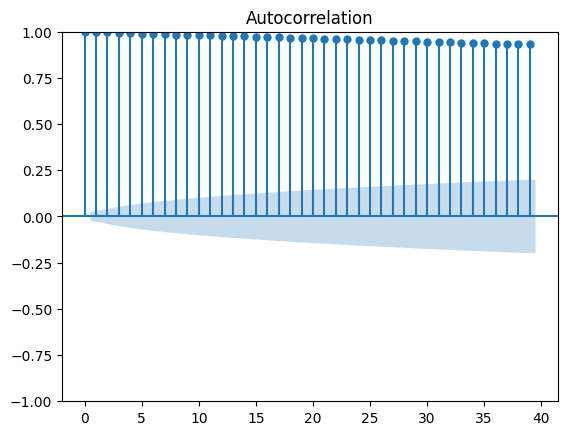

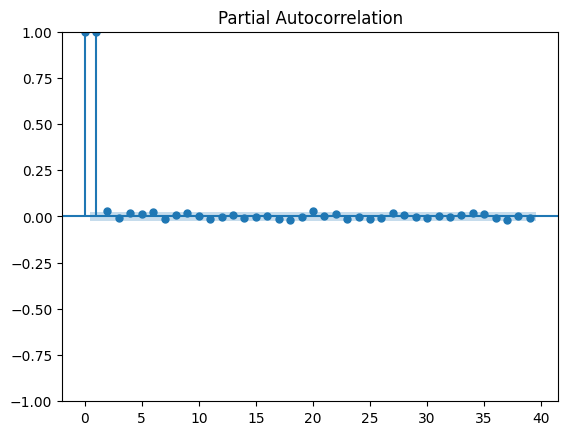

In [33]:
# Convert Spark DataFrame to Pandas DataFrame
dataset_pd = dataset.toPandas()

# Convert 'Date' column to datetime and set it as index
dataset_pd['Date'] = pd.to_datetime(dataset_pd['Date'])

# Ensure the dataset is sorted and has no duplicates
dataset_pd = dataset_pd.sort_values('Date').drop_duplicates(subset='Date')

# Resample to daily frequency if necessary
dataset_pd.set_index('Date', inplace=True)
dataset_pd = dataset_pd.asfreq('D', method='pad')

# Select the series for Modeling
series = dataset_pd['Close']

# Plot ACF and PACF for parameter identification
plot_acf(series)
plot_pacf(series)

# Define and fit the ARIMA model (revised parameters based on ACF and PACF analysis)
model = ARIMA(series, order=(1,1,1))  # Change order based on the ACF and PACF analysis
results = model.fit()

# Summarize model results
print(results.summary())

# Make predictions
predictions = results.forecast(steps=5)

In [34]:
# Check and adjust if 'Date' is already the index or named differently
if 'Date' not in dataset_pd.columns:
    # If 'Date' is not a column, it might already be the index or named differently
    dataset_pd.index = pd.to_datetime(dataset_pd.index)
else:
    # Convert 'Date' column to datetime and set it as index
    dataset_pd['Date'] = pd.to_datetime(dataset_pd['Date'])
    dataset_pd.set_index('Date', inplace=True)

# Remove duplicates if they exist
dataset_pd = dataset_pd[~dataset_pd.index.duplicated(keep='first')]

# Resample to daily frequency if necessary, filling any missing values
dataset_pd = dataset_pd.asfreq('D', method='pad')
series = dataset_pd['Close']

# Define the p, d, and q parameters to take values between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Iterate over all combinations and fit ARIMA models
model_results = []
for param in pdq:
    try:
        model = ARIMA(series, order=param)
        results = model.fit()
        model_results.append({
            'Order': param,
            'AIC': results.aic,
            'BIC': results.bic
        })
        print(f'ARIMA{param} - AIC:{results.aic} - BIC:{results.bic}')
    except:
        continue

# Convert the results to a DataFrame
results_df = pd.DataFrame(model_results)

# Sort by AIC and BIC
sorted_results_aic = results_df.sort_values(by='AIC')
sorted_results_bic = results_df.sort_values(by='BIC')

# Display the top models based on AIC and BIC
print("\nTop models based on AIC:")
print(sorted_results_aic.head())

print("\nTop models based on BIC:")
print(sorted_results_bic.head())

ARIMA(0, 0, 0) - AIC:108606.44881321483 - BIC:108620.14525735157
ARIMA(0, 0, 1) - AIC:99569.08782412141 - BIC:99589.63249032652
ARIMA(0, 0, 2) - AIC:92396.04869589483 - BIC:92423.44158416832
ARIMA(0, 1, 0) - AIC:69107.00772672688 - BIC:69113.85580514805
ARIMA(0, 1, 1) - AIC:69102.9257270766 - BIC:69116.62188391894
ARIMA(0, 1, 2) - AIC:69103.20105638652 - BIC:69123.74529165002
ARIMA(0, 2, 0) - AIC:74126.65009326978 - BIC:74133.49802802311
ARIMA(0, 2, 1) - AIC:69108.755321027 - BIC:69122.45119053365
ARIMA(0, 2, 2) - AIC:69104.43266673843 - BIC:69124.97647099842
ARIMA(1, 0, 0) - AIC:69122.1961236198 - BIC:69142.74078982491
ARIMA(1, 0, 1) - AIC:69118.45466928263 - BIC:69145.84755755612
ARIMA(1, 0, 2) - AIC:69118.54932783957 - BIC:69152.79043818143
ARIMA(1, 1, 0) - AIC:69102.73938431306 - BIC:69116.4355411554
ARIMA(1, 1, 1) - AIC:69102.80701350047 - BIC:69123.35124876397
ARIMA(1, 1, 2) - AIC:69105.14223943607 - BIC:69132.53455312074
ARIMA(1, 2, 0) - AIC:71911.90900086131 - BIC:71925.6048703

Interpretation of AIC and BIC

    AIC (Akaike Information Criterion):
        AIC is a measure of the relative quality of a statistical model for a given set of data. A lower AIC value suggests a better model.
        It balances the complexity of the model (number of parameters) against how well the model fits the data.

    BIC (Bayesian Information Criterion):
        Similar to AIC, BIC provides a way to compare models. It penalizes more complex models more than AIC does.
        A lower BIC value indicates a better model and is especially useful for models with a larger number of observations.

Analysis of Your Results

    Top Models by AIC:
        The models with the lowest AIC are ARIMA(1, 1, 0), ARIMA(1, 1, 1), ARIMA(0, 1, 1), ARIMA(2, 1, 0), and ARIMA(0, 1, 2).
        These models are preferable in terms of balancing model complexity and fit.

    Top Models by BIC:
        The models with the lowest BIC are ARIMA(0, 1, 0), ARIMA(1, 1, 0), ARIMA(0, 1, 1), ARIMA(0, 2, 1), and ARIMA(1, 1, 1).
        These models are more parsimonious (simpler) and are generally preferred when dealing with larger datasets or when overfitting is a concern.

Recommendations and Next Steps

    Model Selection:
        ARIMA(1, 1, 0) and ARIMA(1, 1, 1) appear in both top AIC and BIC lists, making them strong candidates. These models are likely to provide a good balance between complexity and fit.

        In summary, the results indicate that simpler models (like ARIMA(1, 1, 0)) are performing well compared to more complex ones. This is a good indication that your time series might not require highly complex ARIMA configurations to achieve effective modeling and forecasting.

## LSTM Model

In [35]:
# Convert the Spark DataFrame to a Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Selecting the relevant columns for input features and the target variable 'Close'
feature_columns = ['Close', 'InterestRate', 'BondRate', 'InflationRate']
target_column = 'Close'

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[feature_columns])

# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    target_idx = dataset_knn_pd.columns.get_loc(target_column)
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, target_idx])
    return np.array(X), np.array(Y)

# Prepare the dataset with a specified look back period
look_back = 1
X, Y = create_dataset(scaled_data, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.67)
trainX, trainY = X[:train_size], Y[:train_size]
testX, testY = X[train_size:], Y[train_size:]

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, len(feature_columns)))
testX = np.reshape(testX, (testX.shape[0], look_back, len(feature_columns)))

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(feature_columns))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, np.zeros((trainPredict.shape[0], len(feature_columns)-1)))))
testPredict = scaler.inverse_transform(np.column_stack((testPredict, np.zeros((testPredict.shape[0], len(feature_columns)-1)))))
trainY_original = scaler.inverse_transform(np.column_stack((trainY.reshape(-1, 1), np.zeros((trainY.shape[0], len(feature_columns)-1)))))
testY_original = scaler.inverse_transform(np.column_stack((testY.reshape(-1, 1), np.zeros((testY.shape[0], len(feature_columns)-1)))))

# Calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(trainY_original[:, 0], trainPredict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(testY_original[:, 0], testPredict[:, 0]))
test_mape = mean_absolute_percentage_error(testY_original[:, 0], testPredict[:, 0])
test_r2 = r2_score(testY_original[:, 0], testPredict[:, 0])

# Print the performance metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)
print('Test R²:', test_r2)

447/447 [==============================] - 0s 679us/step
Train RMSE: 61.111676809707674
Test RMSE: 58.76337465100199
Test MAPE: 0.007766854402268674
Test R²: 0.9930825535728107


### Step 1: Building the Basic LSTM Model

In [36]:
def build_lstm_model(input_shape, neurons=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Single output neuron for prediction
    return model

### Step 2: Data Preparation for LSTM Model
Now, let's prepare the data for training the LSTM model. This involves normalizing the data and creating lagged features as input for the LSTM. We'll use the 'Close' price and additional indicators from your dataset.

In [37]:
feature_columns = ['Close', 'InterestRate', 'BondRate', 'InflationRate'] 

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[feature_columns])

# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, 0])  #  'Close' is the first column
    return np.array(X), np.array(Y)

# Create the lagged dataset
look_back = 1  # This can be adjusted
X, Y = create_dataset(scaled_data, look_back)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
trainX, trainY = X[:train_size], Y[:train_size]
testX, testY = X[train_size:], Y[train_size:]

### Step 3: Basic Model Training

With the  data prepared, the next step is to train the LSTM model with a basic set of hyperparameters. We'll start with a single LSTM layer and a standard configuration, then build from there.

In [38]:
# Build the LSTM model
input_shape = (look_back, len(feature_columns))
model = build_lstm_model(input_shape, neurons=50, dropout_rate=0.2)  # Basic configuration

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.2, verbose=0)  # Basic training

### Step 4: Model Evaluation on Test Data

Great, The model has been trained! Now, let's evaluate its performance on the test data. We'll make predictions and then calculate performance metrics like RMSE (Root Mean Squared Error) to assess how well the model is doing.

In [39]:
# Calculate MAPE
test_mape = mean_absolute_percentage_error(testY_original[:, 0], testPredict[:, 0])

# Calculate R² Score
test_r2 = r2_score(testY_original[:, 0], testPredict[:, 0])

print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)
print('Test R²:', test_r2)

Test RMSE: 58.76337465100199
Test MAPE: 0.007766854402268674
Test R²: 0.9930825535728107


### Step 5: Hyperparameter Tuning

Now that the evaluated the basic model, the next step is to perform hyperparameter tuning. This involves systematically experimenting with different model configurations to improve performance. We'll focus on tuning key hyperparameters like the number of neurons and learning rate.

Given the iterative nature of this process, it's efficient to create a function that handles model creation, training, and evaluation for different sets of hyperparameters

In [40]:
def hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes):
    results = []
    for neurons in neurons_list:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                model = Sequential()
                model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
                model.add(Dropout(0.2))
                model.add(Dense(1))
                model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
                model.fit(trainX, trainY, epochs=20, batch_size=batch_size, verbose=0)
                testPredict = model.predict(testX)
                test_rmse = np.sqrt(mean_squared_error(testY, testPredict))
                test_mape = mean_absolute_percentage_error(testY, testPredict)
                test_r2 = r2_score(testY, testPredict)
                results.append({
                    'Neurons': neurons, 'Learning Rate': lr, 'Batch Size': batch_size,
                    'Test RMSE': test_rmse, 'Test MAPE': test_mape, 'Test R²': test_r2
                })
    return pd.DataFrame(results)

# Define the hyperparameters to test
neurons_list = [50, 100]
learning_rates = [0.01, 0.001]
batch_sizes = [32, 64]

results = hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes)
print(results)

447/447 [==============================] - 1s 907us/step
   Neurons  Learning Rate  Batch Size  Test RMSE  Test MAPE   Test R²
0       50          0.010          32   0.008986   0.010371  0.996333
1       50          0.010          64   0.008794   0.010901  0.996488
2       50          0.001          32   0.014980   0.018996  0.989809
3       50          0.001          64   0.005980   0.005307  0.998376
4      100          0.010          32   0.012692   0.011650  0.992684
5      100          0.010          64   0.007046   0.008464  0.997746
6      100          0.001          32   0.007979   0.007646  0.997109
7      100          0.001          64   0.009811   0.011963  0.995629


####  Increase the Range of Neurons: Test a broader range of neuron numbers in LSTM layers, such as [30, 50, 100, 150]. More neurons can capture more complex patterns but also risk overfitting.

####  Experiment with More Learning Rates: Include more varied learning rates, like [0.0001, 0.001, 0.01, 0.1]. This helps in finding the sweet spot where the model learns optimally – not too slow and not missing subtleties.

####  Test Additional Batch Sizes: Larger batch sizes like [32, 64, 128] can be tried to see how they impact the model's ability to generalize.

####  Increase Epochs for Deeper Training: If computational resources allow, increasing epochs will give the model more time to learn, being aware off on overfitting.

In [44]:
# Model Already Trained

def hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes, epochs):
    results = []
    
    for neurons in neurons_list:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                # Build the model
                model = Sequential()
                model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
                model.add(Dropout(0.2))
                model.add(Dense(1))
                model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

                # Train the model
                model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model
                testPredict = model.predict(testX)
                test_rmse = np.sqrt(mean_squared_error(testY, testPredict))
                test_mape = mean_absolute_percentage_error(testY, testPredict)
                test_r2 = r2_score(testY, testPredict)

                # Record the results
                results.append({
                    'Neurons': neurons,
                    'Learning Rate': lr,
                    'Batch Size': batch_size,
                    'Epochs': epochs,
                    'Test RMSE': test_rmse,
                    'Test MAPE': test_mape,
                    'Test R²': test_r2
                })
    
    return pd.DataFrame(results)

# Define the new hyperparameters
neurons_list = [30, 50, 100, 150]
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs = 100  # Adjust based on computational capacity

# Run the hyperparameter tuning
expanded_results = hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes, epochs)
print(expanded_results)

447/447 [==============================] - 1s 908us/step
    Neurons  Learning Rate  Batch Size  Epochs  Test RMSE  Test MAPE   Test R²
0        30         0.0001          32     100   0.005374   0.003900  0.998689
1        30         0.0001          64     100   0.007058   0.006226  0.997738
2        30         0.0001         128     100   0.008960   0.008349  0.996354
3        30         0.0010          32     100   0.006021   0.006107  0.998354
4        30         0.0010          64     100   0.006093   0.004931  0.998314
5        30         0.0010         128     100   0.007067   0.006960  0.997732
6        30         0.0100          32     100   0.012469   0.015380  0.992940
7        30         0.0100          64     100   0.006892   0.006358  0.997843
8        30         0.0100         128     100   0.024002   0.027778  0.973837
9        30         0.1000          32     100   0.076044   0.061931  0.737396
10       30         0.1000          64     100   0.147891   0.093238  0.00

In [45]:
model.save('expanded_results.h5')
FileLink('expanded_results.h5')

/home/fabiopoli/Desktop/expanded_results.h5

## Backtesting

1352/1352 [==============================] - 1s 723us/step


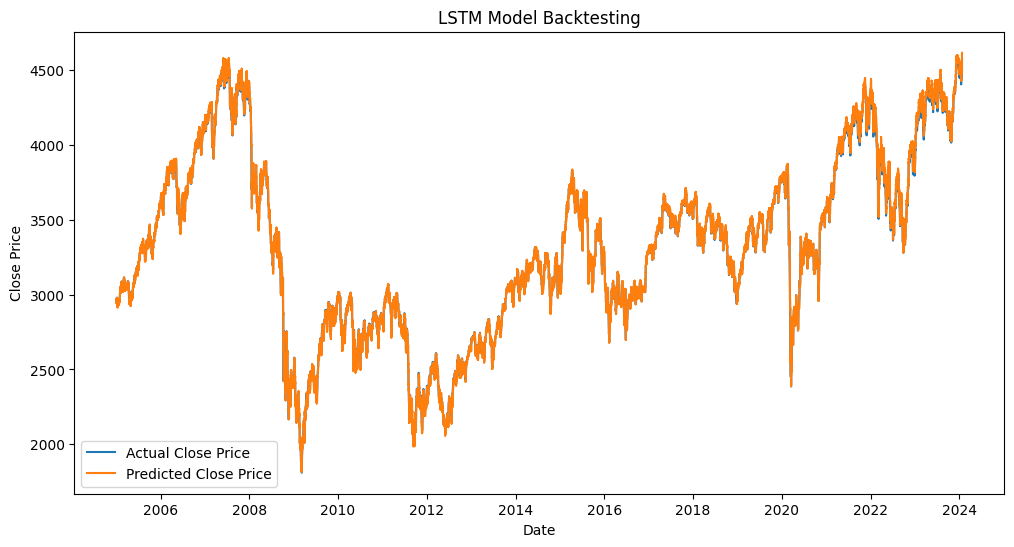

In [46]:
# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convert Spark DataFrame to Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Convert to numeric
dataset_knn_pd.dropna(inplace=True)
dataset_knn_pd[['Close', 'InterestRate', 'BondRate', 'InflationRate']] = dataset_knn_pd[['Close', 'InterestRate', 'BondRate', 'InflationRate']].apply(pd.to_numeric)

# Normalize the historical data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[['Close', 'InterestRate', 'BondRate', 'InflationRate']])

# Prepare data for backtesting
look_back = 1  # Use the same look_back as the previous model
X_backtest, Y_backtest = create_dataset(scaled_data, look_back)

# Path to the trained model
model_path = 'expanded_results.h5'

# Load the trained model
model = load_model(model_path)

# Generate predictions
predictions = model.predict(X_backtest)

# Invert predictions to original scale
predictions_inverted = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1)))))[:, 0]

# Visualization: Plotting Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(dataset_knn_pd['Date'], dataset_knn_pd['Close'], label='Actual Close Price')
plt.plot(dataset_knn_pd['Date'][look_back+1:], predictions_inverted, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model Backtesting')
plt.legend()
plt.show()

# Optuna Keras Model

In [47]:
# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to be optimized
    neurons = trial.suggest_categorical('neurons', [30, 50, 100, 150])
    learning_rate = trial.suggest_categorical('learning_rate', [0.0001, 0.001, 0.01, 0.1])
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 20, 100)

    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Cross-validation with time series split
    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_index, val_index in tscv.split(trainX):
        X_train_fold, X_val_fold = trainX[train_index], trainX[val_index]
        y_train_fold, y_val_fold = trainY[train_index], trainY[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model
        predictions = model.predict(X_val_fold)
        rmse_score = np.sqrt(mean_squared_error(y_val_fold, predictions))
        rmse_scores.append(rmse_score)

    # Return the mean RMSE score over all folds
    return np.mean(rmse_scores)

# Example usage of Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the optimal hyperparameters
print(study.best_params)

# The following code would use the best hyperparameters to train the final model
best_neurons = study.best_params['neurons']
best_lr = study.best_params['learning_rate']
best_batch_size = study.best_params['batch_size']
best_epochs = study.best_params['epochs']

model = Sequential()
model.add(LSTM(best_neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_lr), loss='mean_squared_error')

# Train with the full training data
model.fit(trainX, trainY, epochs=best_epochs, batch_size=best_batch_size, verbose=0)

[I 2024-01-28 22:01:48,827] A new study created in memory with name: no-name-61abee59-a27a-403b-98a4-a5ee623ab705


151/151 [==============================] - 0s 772us/step


[I 2024-01-28 22:02:09,635] Trial 0 finished with value: 0.010873363243983643 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 25}. Best is trial 0 with value: 0.010873363243983643.


151/151 [==============================] - 0s 985us/step


[I 2024-01-28 22:05:20,818] Trial 1 finished with value: 0.09615804401731476 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 51}. Best is trial 0 with value: 0.010873363243983643.


151/151 [==============================] - 0s 797us/step


[I 2024-01-28 22:07:37,955] Trial 2 finished with value: 0.009037704338515527 and parameters: {'neurons': 50, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 72}. Best is trial 2 with value: 0.009037704338515527.


151/151 [==============================] - 0s 791us/step


[I 2024-01-28 22:09:18,127] Trial 3 finished with value: 0.022596554443229284 and parameters: {'neurons': 50, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 52}. Best is trial 2 with value: 0.009037704338515527.


151/151 [==============================] - 0s 889us/step


[I 2024-01-28 22:11:01,168] Trial 4 finished with value: 0.008700486927774548 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 35}. Best is trial 4 with value: 0.008700486927774548.


151/151 [==============================] - 0s 780us/step


[I 2024-01-28 22:11:59,948] Trial 5 finished with value: 0.034399308145659155 and parameters: {'neurons': 50, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 56}. Best is trial 4 with value: 0.008700486927774548.


151/151 [==============================] - 0s 1ms/step


[I 2024-01-28 22:18:10,321] Trial 6 finished with value: 0.08828213781585968 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 100}. Best is trial 4 with value: 0.008700486927774548.


151/151 [==============================] - 0s 1ms/step


[I 2024-01-28 22:22:46,256] Trial 7 finished with value: 0.007810076602521747 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 73}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 936us/step


[I 2024-01-28 22:23:51,146] Trial 8 finished with value: 0.015298223194036273 and parameters: {'neurons': 100, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 38}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 897us/step


[I 2024-01-28 22:25:17,778] Trial 9 finished with value: 0.03725532369991616 and parameters: {'neurons': 100, 'learning_rate': 0.0001, 'batch_size': 128, 'epochs': 87}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 654us/step


[I 2024-01-28 22:26:32,112] Trial 10 finished with value: 0.008765663785362865 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 76}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 956us/step


[I 2024-01-28 22:27:38,955] Trial 11 finished with value: 0.010362333794241965 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 22}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 1ms/step


[I 2024-01-28 22:30:02,879] Trial 12 finished with value: 0.008288856625423838 and parameters: {'neurons': 150, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 38}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 1ms/step


[I 2024-01-28 22:34:20,291] Trial 13 finished with value: 0.008039220351794557 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 69}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 945us/step


[I 2024-01-28 22:38:35,048] Trial 14 finished with value: 0.007872979346817502 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 68}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 990us/step


[I 2024-01-28 22:40:36,392] Trial 15 finished with value: 0.03385193458332034 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 128, 'epochs': 82}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 661us/step


[I 2024-01-28 22:42:31,988] Trial 16 finished with value: 0.0179446929050557 and parameters: {'neurons': 30, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 64}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 836us/step


[I 2024-01-28 22:48:15,646] Trial 17 finished with value: 0.007817955104428006 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 92}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 910us/step


[I 2024-01-28 22:50:40,993] Trial 18 finished with value: 0.02900319912824647 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 128, 'epochs': 99}. Best is trial 7 with value: 0.007810076602521747.


151/151 [==============================] - 0s 919us/step


[I 2024-01-28 22:53:59,307] Trial 19 finished with value: 0.005870670403953309 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 675us/step


[I 2024-01-28 22:55:17,309] Trial 20 finished with value: 0.012103171705091221 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 81}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 921us/step


[I 2024-01-28 22:58:35,735] Trial 21 finished with value: 0.007719678468011068 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 1ms/step


[I 2024-01-28 23:02:02,349] Trial 22 finished with value: 0.005957905247378194 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 936us/step


[I 2024-01-28 23:05:26,621] Trial 23 finished with value: 0.006590348808359908 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 92}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 942us/step


[I 2024-01-28 23:08:58,848] Trial 24 finished with value: 0.009581368038369521 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 93}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 767us/step


[I 2024-01-28 23:12:04,812] Trial 25 finished with value: 0.007012605822394098 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 84}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 869us/step


[I 2024-01-28 23:14:56,588] Trial 26 finished with value: 0.007909400440065668 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 78}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 731us/step


[I 2024-01-28 23:18:24,613] Trial 27 finished with value: 0.006859908248632507 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 95}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 536us/step


[I 2024-01-28 23:19:48,647] Trial 28 finished with value: 0.011990335572501832 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 88}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 574us/step


[I 2024-01-28 23:21:32,247] Trial 29 finished with value: 0.007715922292222362 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 100}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 740us/step


[I 2024-01-28 23:24:41,680] Trial 30 finished with value: 0.008597529590317931 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 87}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 735us/step


[I 2024-01-28 23:28:08,561] Trial 31 finished with value: 0.009924199062502399 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 95}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 719us/step


[I 2024-01-28 23:31:37,623] Trial 32 finished with value: 0.007894354929745955 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 96}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 789us/step


[I 2024-01-28 23:34:51,334] Trial 33 finished with value: 0.005889188215355274 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 89}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 776us/step


[I 2024-01-28 23:37:43,775] Trial 34 finished with value: 0.007181592321954066 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 79}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 577us/step


[I 2024-01-28 23:39:13,428] Trial 35 finished with value: 0.00793026299479668 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 86}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 783us/step


[I 2024-01-28 23:40:20,824] Trial 36 finished with value: 0.014670791444239061 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 128, 'epochs': 45}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 739us/step


[I 2024-01-28 23:43:39,327] Trial 37 finished with value: 0.0074747218106233524 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 569us/step


[I 2024-01-28 23:45:05,687] Trial 38 finished with value: 0.008915293724039488 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 76}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 825us/step


[I 2024-01-28 23:46:50,649] Trial 39 finished with value: 0.0154749061254356 and parameters: {'neurons': 100, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 62}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 723us/step


[I 2024-01-28 23:48:01,902] Trial 40 finished with value: 0.008602411393941802 and parameters: {'neurons': 150, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 31}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 741us/step


[I 2024-01-28 23:51:37,254] Trial 41 finished with value: 0.007525434008299567 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 96}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 728us/step


[I 2024-01-28 23:54:59,232] Trial 42 finished with value: 0.006337955070994444 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 90}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 760us/step


[I 2024-01-28 23:58:17,094] Trial 43 finished with value: 0.006371381696740867 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 89}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 754us/step


[I 2024-01-29 00:01:20,731] Trial 44 finished with value: 0.00866510031323516 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 83}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 713us/step


[I 2024-01-29 00:03:21,473] Trial 45 finished with value: 0.008657940294757586 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 73}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 746us/step


[I 2024-01-29 00:04:44,482] Trial 46 finished with value: 0.008360382331991245 and parameters: {'neurons': 150, 'learning_rate': 0.001, 'batch_size': 128, 'epochs': 55}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 877us/step


[I 2024-01-29 00:08:00,995] Trial 47 finished with value: 0.027618696018411566 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 89}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 650us/step


[I 2024-01-29 00:09:22,959] Trial 48 finished with value: 0.007892426537166843 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 85}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 561us/step


[I 2024-01-29 00:11:05,889] Trial 49 finished with value: 0.009675296350881792 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 98}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 733us/step


[I 2024-01-29 00:12:47,316] Trial 50 finished with value: 0.006793280628088598 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 68}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 752us/step


[I 2024-01-29 00:16:06,845] Trial 51 finished with value: 0.0067783560762385755 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 736us/step


[I 2024-01-29 00:19:20,066] Trial 52 finished with value: 0.007062392339943428 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 88}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 714us/step


[I 2024-01-29 00:22:43,113] Trial 53 finished with value: 0.00633111940380718 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 93}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 738us/step


[I 2024-01-29 00:25:37,684] Trial 54 finished with value: 0.006128776555726174 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 80}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 692us/step


[I 2024-01-29 00:27:47,814] Trial 55 finished with value: 0.00884410848304992 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 80}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 760us/step


[I 2024-01-29 00:31:00,656] Trial 56 finished with value: 0.006921333705907438 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 83}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 909us/step


[I 2024-01-29 00:37:05,860] Trial 57 finished with value: 0.010020505772629222 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 94}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 756us/step


[I 2024-01-29 00:39:59,735] Trial 58 finished with value: 0.015703751732987374 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 77}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 565us/step


[I 2024-01-29 00:41:35,896] Trial 59 finished with value: 0.012677373528577365 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 963us/step


[I 2024-01-29 00:44:06,133] Trial 60 finished with value: 0.007177979327265156 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 100}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 849us/step


[I 2024-01-29 00:47:24,759] Trial 61 finished with value: 0.008210748296407683 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 89}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 777us/step


[I 2024-01-29 00:50:33,781] Trial 62 finished with value: 0.0060961445021241265 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 85}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 786us/step


[I 2024-01-29 00:53:42,565] Trial 63 finished with value: 0.0066110951020296 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 85}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 930us/step


[I 2024-01-29 00:57:10,425] Trial 64 finished with value: 0.0068886574179725605 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 93}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 746us/step


[I 2024-01-29 00:59:48,081] Trial 65 finished with value: 0.006096019324276492 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 71}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 753us/step


[I 2024-01-29 01:02:25,263] Trial 66 finished with value: 0.021255863450744778 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 71}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 841us/step


[I 2024-01-29 01:07:31,474] Trial 67 finished with value: 0.011071257460376138 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 81}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 721us/step


[I 2024-01-29 01:10:17,168] Trial 68 finished with value: 0.0060128465011115425 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 75}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 728us/step


[I 2024-01-29 01:12:18,566] Trial 69 finished with value: 0.008322764520040006 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 74}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 569us/step


[I 2024-01-29 01:13:27,022] Trial 70 finished with value: 0.007035000350382718 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 65}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 722us/step


[I 2024-01-29 01:16:19,995] Trial 71 finished with value: 0.006712735923291714 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 79}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 909us/step


[I 2024-01-29 01:19:04,230] Trial 72 finished with value: 0.007320726618066958 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 75}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 733us/step


[I 2024-01-29 01:22:03,544] Trial 73 finished with value: 0.006932436533276955 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 82}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 724us/step


[I 2024-01-29 01:24:38,724] Trial 74 finished with value: 0.008670019520557432 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 71}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 742us/step


[I 2024-01-29 01:27:43,273] Trial 75 finished with value: 0.00639341369112677 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 84}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 757us/step


[I 2024-01-29 01:30:53,549] Trial 76 finished with value: 0.006774866548194325 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 87}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 572us/step


[I 2024-01-29 01:32:01,516] Trial 77 finished with value: 0.03948557743737143 and parameters: {'neurons': 30, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 59}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 766us/step


[I 2024-01-29 01:35:13,469] Trial 78 finished with value: 0.010470215628945099 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 48}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 771us/step


[I 2024-01-29 01:38:09,379] Trial 79 finished with value: 0.020764298380530986 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 77}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 791us/step


[I 2024-01-29 01:39:52,817] Trial 80 finished with value: 0.006929346030860909 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 67}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 748us/step


[I 2024-01-29 01:43:30,191] Trial 81 finished with value: 0.007780111196579116 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 90}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 847us/step


[I 2024-01-29 01:46:59,960] Trial 82 finished with value: 0.008064130178541212 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 93}. Best is trial 19 with value: 0.005870670403953309.


151/151 [==============================] - 0s 739us/step


[I 2024-01-29 01:50:13,718] Trial 83 finished with value: 0.005682105863630768 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 86}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 740us/step


[I 2024-01-29 01:53:24,097] Trial 84 finished with value: 0.0076942175895822005 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 85}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 780us/step


[I 2024-01-29 01:56:38,883] Trial 85 finished with value: 0.006696665625788451 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 87}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 742us/step


[I 2024-01-29 01:59:39,553] Trial 86 finished with value: 0.00913607811317248 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 81}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 574us/step


[I 2024-01-29 02:01:20,829] Trial 87 finished with value: 0.008935750705741981 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 95}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 726us/step


[I 2024-01-29 02:04:44,371] Trial 88 finished with value: 0.009229996809952252 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 92}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 742us/step


[I 2024-01-29 02:06:55,171] Trial 89 finished with value: 0.00895964826726424 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 79}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 771us/step


[I 2024-01-29 02:10:30,030] Trial 90 finished with value: 0.006793232176612608 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 769us/step


[I 2024-01-29 02:13:46,924] Trial 91 finished with value: 0.007398997136076743 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 89}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 741us/step


[I 2024-01-29 02:16:50,500] Trial 92 finished with value: 0.008644474699430924 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 83}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 739us/step


[I 2024-01-29 02:20:11,224] Trial 93 finished with value: 0.0069150062677778654 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 744us/step


[I 2024-01-29 02:23:18,463] Trial 94 finished with value: 0.008763361713942656 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 85}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 774us/step


[I 2024-01-29 02:26:30,293] Trial 95 finished with value: 0.005843898759439727 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 87}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 564us/step


[I 2024-01-29 02:27:54,076] Trial 96 finished with value: 0.008179311518072397 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 87}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 747us/step


[I 2024-01-29 02:29:41,474] Trial 97 finished with value: 0.037475336858955245 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 128, 'epochs': 72}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 737us/step


[I 2024-01-29 02:33:07,475] Trial 98 finished with value: 0.01842095871741609 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 94}. Best is trial 83 with value: 0.005682105863630768.


151/151 [==============================] - 0s 742us/step


[I 2024-01-29 02:37:57,931] Trial 99 finished with value: 0.0121627925599611 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 77}. Best is trial 83 with value: 0.005682105863630768.


{'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 86}


### Saving Optuna Study Results and the Best Model

The Optuna study results are saved in a CSV format (`optuna_study_results.csv`) to provide a comprehensive and easy-to-analyze historical record of the hyperparameter optimization process. This CSV file includes detailed information about each trial, such as the hyperparameters used and the performance metrics obtained. It allows for in-depth analysis and visualization of the optimization process, enabling insights into how different hyperparameters impact model performance.

Additionally, the best-performing model is saved in an `.h5` format (`best_model.h5`). This file stores the architecture, weights, and training configuration of the trained model, allowing for easy reloading and reuse of the model without the need to retrain. It's essential for deploying the model in production or for further evaluation and testing.

By saving both the study results and the model, we ensure a comprehensive record of the optimization process and retain the ability to deploy the best-performing model efficiently.


In [2]:
# Save the study results to a dataframe
study_results = study.trials_dataframe()

# Save the dataframe to a CSV file
study_results.to_csv('optuna_study_results.csv', index=False)

# Save the best model
model.save('best_model.h5')

# To load the study results later
loaded_results = pd.read_csv('optuna_study_results.csv')

# To load the model
loaded_model = load_model('best_model.h5')

NameError: name 'study' is not defined

In [48]:
model.save("optuna_model.h5")
FileLink('optuna_model.h5')

/home/fabiopoli/Desktop/optuna_model.h5

### Table for Hyperparameter Comparison

In [ ]:
import optuna
import optuna.visualization as ov

# Hyperparameter importance
hyperparam_importance = ov.plot_param_importances(study)
hyperparam_importance.show()

# Optimization history
opt_history = ov.plot_optimization_history(study)
opt_history.show()

# Slice plots for all hyperparameters
for param in study.best_params:
    slice_plot = ov.plot_slice(study, params=[param])
    slice_plot.show()

### Computational Efficiency

In [49]:
start_time = time.time()
model.fit(trainX, trainY, epochs=best_epochs, batch_size=best_batch_size)
training_time = time.time() - start_time

start_time = time.time()
predictions = model.predict(testX)
inference_time = time.time() - start_time

print(f"Training Time: {training_time} seconds")
print(f"Inference Time: {inference_time} seconds")

Epoch 1/86
453/453 [==============================] - 2s 4ms/step - loss: 1.2186e-04
Epoch 2/86
453/453 [==============================] - 1s 3ms/step - loss: 1.2276e-04
Epoch 3/86
453/453 [==============================] - 1s 3ms/step - loss: 1.2269e-04
Epoch 4/86
453/453 [==============================] - 1s 3ms/step - loss: 1.1946e-04
Epoch 5/86
453/453 [==============================] - 1s 2ms/step - loss: 1.1727e-04
Epoch 6/86
453/453 [==============================] - 1s 3ms/step - loss: 1.2030e-04
Epoch 7/86
453/453 [==============================] - 1s 2ms/step - loss: 1.2274e-04
Epoch 8/86
453/453 [==============================] - 1s 2ms/step - loss: 1.2041e-04
Epoch 9/86
453/453 [==============================] - 1s 3ms/step - loss: 1.2197e-04
Epoch 10/86
453/453 [==============================] - 1s 3ms/step - loss: 1.2893e-04
Epoch 11/86
453/453 [==============================] - 1s 3ms/step - loss: 1.1707e-04
Epoch 12/86
453/453 [==============================] - 1s 3ms/s

### Model Complexity Optuna Model

In [50]:
model.summary() # Gives the number of parameters
model.save("optuna_model.h5")


model_size = os.path.getsize("optuna_model.h5")
print(f"Model Size: {model_size} bytes")

Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_158 (LSTM)             (None, 150)               93000     
                                                                 
 dropout_158 (Dropout)       (None, 150)               0         
                                                                 
 dense_158 (Dense)           (None, 1)                 151       
                                                                 
Total params: 93151 (363.87 KB)
Trainable params: 93151 (363.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Size: 1147192 bytes


### Overfitting/Underfitting Analysis

Epoch 1/86
363/363 [==============================] - 2s 4ms/step - loss: 1.3820e-04 - val_loss: 7.1905e-05
Epoch 2/86
363/363 [==============================] - 1s 3ms/step - loss: 1.3941e-04 - val_loss: 2.5421e-05
Epoch 3/86
363/363 [==============================] - 1s 3ms/step - loss: 1.4054e-04 - val_loss: 4.0243e-05
Epoch 4/86
363/363 [==============================] - 1s 3ms/step - loss: 1.4113e-04 - val_loss: 6.5428e-05
Epoch 5/86
363/363 [==============================] - 1s 3ms/step - loss: 1.3395e-04 - val_loss: 2.7098e-05
Epoch 6/86
363/363 [==============================] - 1s 3ms/step - loss: 1.3550e-04 - val_loss: 3.4214e-05
Epoch 7/86
363/363 [==============================] - 1s 3ms/step - loss: 1.3286e-04 - val_loss: 2.4909e-05
Epoch 8/86
363/363 [==============================] - 1s 3ms/step - loss: 1.2545e-04 - val_loss: 2.4871e-05
Epoch 9/86
363/363 [==============================] - 1s 3ms/step - loss: 1.3535e-04 - val_loss: 2.5630e-05
Epoch 10/86
363/363 [=======

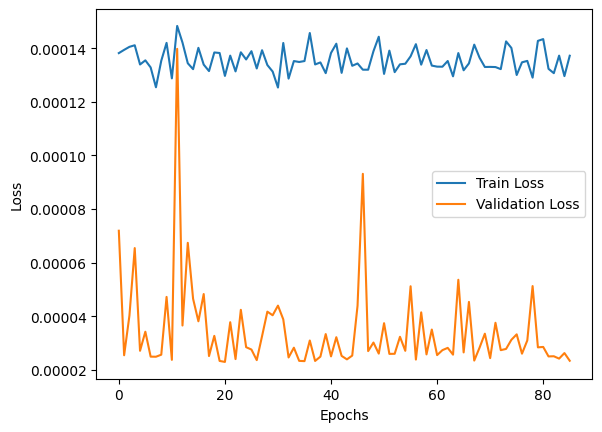

In [51]:
history = model.fit(trainX, trainY, validation_split=0.2, epochs=best_epochs, batch_size=best_batch_size)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
from keras.models import load_model

# Load the model
model = load_model('optuna_model.h5')

# Summarize model.
model.summary()


Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_158 (LSTM)             (None, 150)               93000     
                                                                 
 dropout_158 (Dropout)       (None, 150)               0         
                                                                 
 dense_158 (Dense)           (None, 1)                 151       
                                                                 
Total params: 93151 (363.87 KB)
Trainable params: 93151 (363.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
